In [58]:
import pandas as pd

In [59]:
data=pd.read_csv('HCBG_Customer_dataset.csv',encoding='UTF8')
# data.info()
df=data.iloc[:,[5,9,22,24,25,29,30,37,43]]
numerical_df=data.iloc[:,list(range(49,59,1))]
numerical_df=numerical_df.drop("convoptyss",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Country                                      1978 non-null   object
 1   Division                                     1978 non-null   object
 2   Has Mobile Phone Number                      1978 non-null   int64 
 3   Integrated Marketing and Sales Funnel Stage  1389 non-null   object
 4   Job Role                                     1788 non-null   object
 5   Lead Source Most Recent                      1971 non-null   object
 6   Lead Source Original                         1978 non-null   object
 7   Salutation                                   607 non-null    object
 8   SFDC Last Campaign Status                    867 non-null    object
dtypes: int64(1), object(8)
memory usage: 139.2+ KB


In [60]:
df["lead_source_change"]= df["Lead Source Most Recent"] != df["Lead Source Original"]
df=df.iloc[:,[0,1,2,3,4,7,8,9]]
df

C:\Users\adg9yzz\AppData\Local\Temp\1\ipykernel_23716\3233879773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lead_source_change"]= df["Lead Source Most Recent"] != df["Lead Source Original"]


,Country,Division,Has Mobile Phone Number,Integrated Marketing and Sales Funnel Stage,Job Role,Salutation,SFDC Last Campaign Status,lead_source_change
0,Japan,MSD - Medical Solutions Division,0,MQL,Nurse,NaN,NaN,False
1,New Zealand,MSD - Medical Solutions Division,0,NaN,General Dentist,Dr.,NaN,True
2,Korea - Republic of,OCSD - Oral Care Solutions Division,1,MQL,General Dentist,Dr.,Optional,False
3,Korea - Republic of,OCSD - Oral Care Solutions Division,1,NaN,General Dentist,Dr.,NaN,True
4,Malaysia,OCSD - Oral Care Solutions Division,1,MQL,General Dentist,Dr.,NaN,True
...,...,...,...,...,...,...,...,...
1973,India,OCSD - Oral Care Solutions Division,0,MQL,Oral Surgeon,Dr.,NaN,True
1974,India,OCSD - Oral Care Solutions Division,0,MQL,Endodontist,Dr.,NaN,True
1975,India,MSD - Medical Solutions Division,0,Sales Accepted Lead,Nurse,NaN,NaN,False
1976,Japan,MSD - Medical Solutions Division,0,MQL,NaN,NaN,NaN,False


In [61]:
#숫자 데이터프레임 정규화

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_num_data=scaler.fit_transform(numerical_df)
# scaled_num_data

pca = PCA(n_components = 4)
PCA_result=pca.fit_transform(scaled_num_data)
print(pca.explained_variance_ratio_)
PCA_df=pd.DataFrame(data = PCA_result
             , columns = ['PCA1', 'PCA2','PCA3','PCA4'])
sum(pca.explained_variance_ratio_)

[0.3704451  0.23311671 0.11710478 0.09053216]


0.8111987647393597

In [62]:
total_df=pd.concat([df,PCA_df],axis=1)
total_df.fillna('None',inplace=True)

In [63]:
#dentist, nurse 외 직업 others로 통합하기
total_df.loc[(total_df["Job Role"]=="General Dentist"),"Job Role"]="General Dentist"
total_df.loc[(total_df["Job Role"]=="Nurse"),"Job Role"]="Nurse"
total_df.loc[(total_df["Job Role"]!="Nurse") & (total_df["Job Role"]!="General Dentist"),"Job Role"]="Others"

In [64]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      1978 non-null   object 
 1   Division                                     1978 non-null   object 
 2   Has Mobile Phone Number                      1978 non-null   int64  
 3   Integrated Marketing and Sales Funnel Stage  1978 non-null   object 
 4   Job Role                                     1978 non-null   object 
 5   Salutation                                   1978 non-null   object 
 6   SFDC Last Campaign Status                    1978 non-null   object 
 7   lead_source_change                           1978 non-null   bool   
 8   PCA1                                         1978 non-null   float64
 9   PCA2                                         1978 non-null   float64
 10  

In [65]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=2, init='Huang', n_init=1, verbose=True)
arr=kp.fit_predict(total_df, categorical=[0,1,2,3,4,5,6,7])
total_df['result']=pd.Series(arr)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 94, ncost: 14984.603316216617
Run: 1, iteration: 2/100, moves: 60, ncost: 14950.03217496838
Run: 1, iteration: 3/100, moves: 25, ncost: 14941.39126098255
Run: 1, iteration: 4/100, moves: 29, ncost: 14932.282567746159
Run: 1, iteration: 5/100, moves: 7, ncost: 14931.3230254572
Run: 1, iteration: 6/100, moves: 6, ncost: 14930.895297552579
Run: 1, iteration: 7/100, moves: 6, ncost: 14930.05438717716
Run: 1, iteration: 8/100, moves: 4, ncost: 14929.299238503536
Run: 1, iteration: 9/100, moves: 7, ncost: 14925.403123523185
Run: 1, iteration: 10/100, moves: 2, ncost: 14925.092430250277
Run: 1, iteration: 11/100, moves: 0, ncost: 14925.092430250277


Text(0, 0.5, 'PCA2')

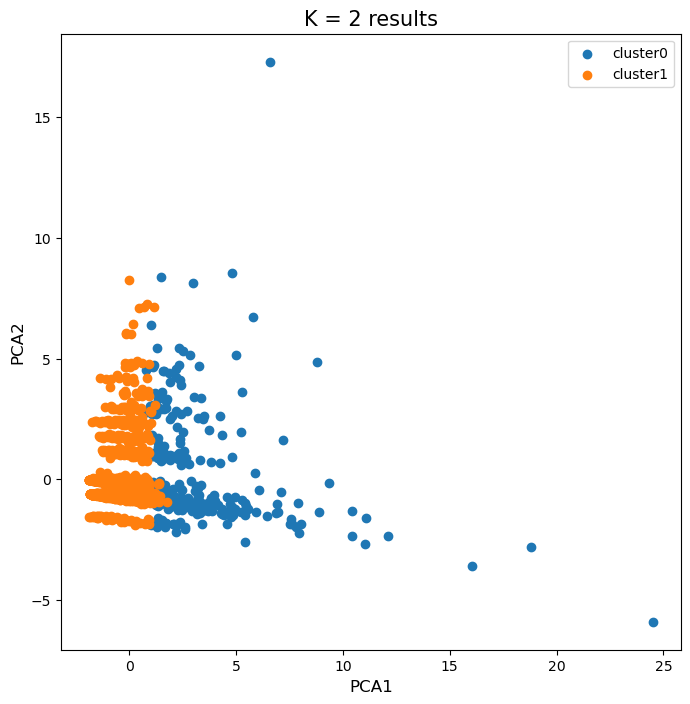

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k=2

for i in range(k):
    plt.scatter(total_df.loc[total_df['result'] == i, 'PCA1'], total_df.loc[total_df['result'] == i, 'PCA2'],  
                label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA1', size = 12)
plt.ylabel('PCA2', size = 12)

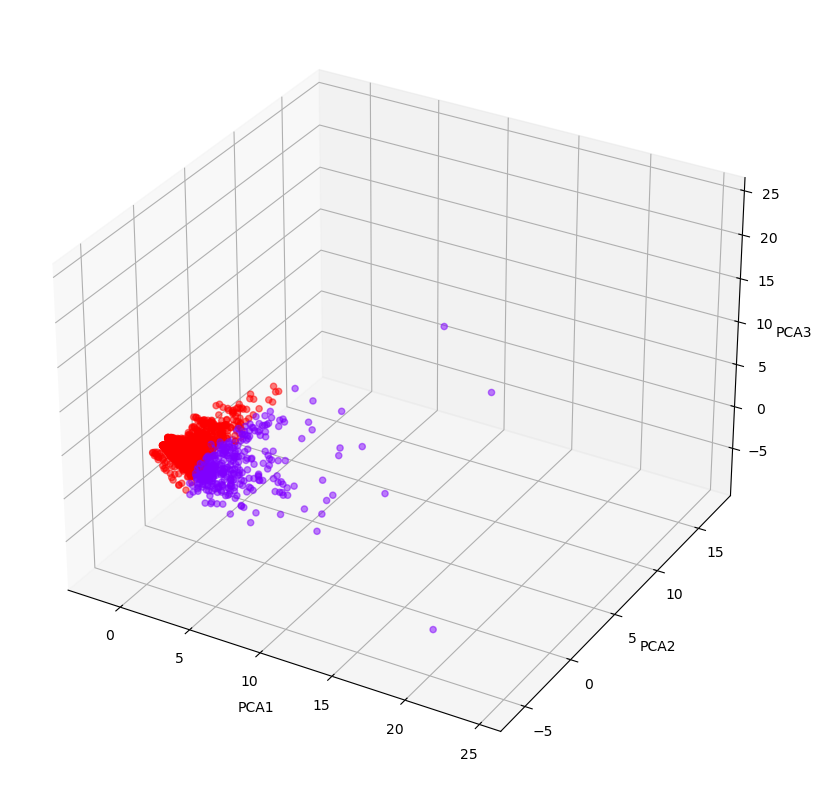

In [67]:
# 위의 clustering 결과를 3차원 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

x = total_df['PCA1']
y = total_df['PCA2']
z = total_df['PCA3']
ax.scatter(x, y, z, c = total_df["result"], s= 20, alpha=0.5, cmap='rainbow')


In [68]:
from sklearn.metrics import silhouette_score
score = silhouette_score(PCA_df, kp.labels_, metric='euclidean')
print(score)

0.4524280095929442


In [69]:
total_df=total_df.drop("result",axis=1)

In [70]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)
arr=kp.fit_predict(total_df, categorical=[0,1,2,3,4,5,6,7])
total_df['result']=pd.Series(arr)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 174, ncost: 13471.44335708855
Run: 1, iteration: 2/100, moves: 109, ncost: 13108.78890528943
Run: 1, iteration: 3/100, moves: 94, ncost: 12577.351921700456
Run: 1, iteration: 4/100, moves: 126, ncost: 12440.302002522767
Run: 1, iteration: 5/100, moves: 86, ncost: 12371.87767848268
Run: 1, iteration: 6/100, moves: 19, ncost: 12364.026488980418
Run: 1, iteration: 7/100, moves: 25, ncost: 12356.764812744717
Run: 1, iteration: 8/100, moves: 15, ncost: 12354.840231688513
Run: 1, iteration: 9/100, moves: 5, ncost: 12354.542070179403
Run: 1, iteration: 10/100, moves: 1, ncost: 12354.514978409672
Run: 1, iteration: 11/100, moves: 0, ncost: 12354.514978409672


Text(0, 0.5, 'PCA2')

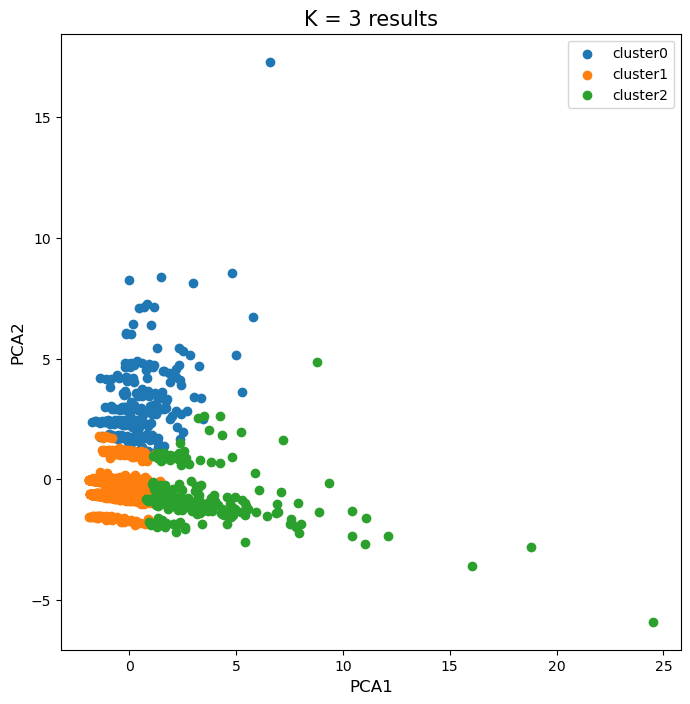

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k=3

for i in range(k):
    plt.scatter(total_df.loc[total_df['result'] == i, 'PCA1'], total_df.loc[total_df['result'] == i, 'PCA2'],  
                label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA1', size = 12)
plt.ylabel('PCA2', size = 12)

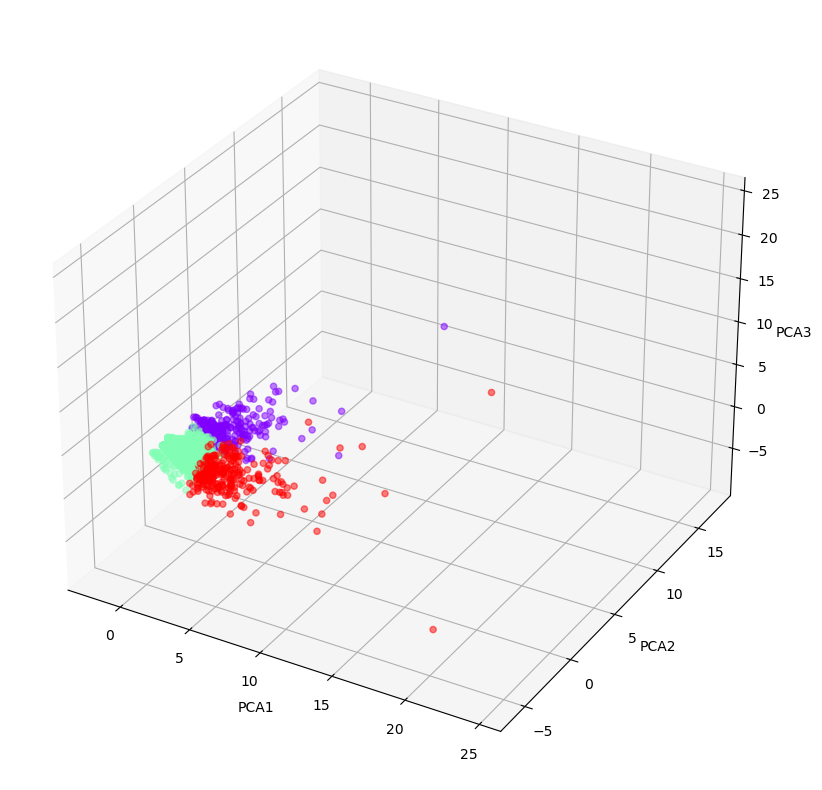

In [72]:
# 위의 clustering 결과를 3차원 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

x = total_df['PCA1']
y = total_df['PCA2']
z = total_df['PCA3']
ax.scatter(x, y, z, c = total_df["result"], s= 20, alpha=0.5, cmap='rainbow')


In [73]:
from sklearn.metrics import silhouette_score
score = silhouette_score(PCA_df, kp.labels_, metric='euclidean')
print(score)

0.46468337858178993


In [74]:
#validation the result


result=total_df[["result"]]
result_df=pd.concat([numerical_df,result],axis=1)

In [75]:
result_df.groupby('result').agg("mean")

,conv leads,convoptys,wonconvoptys,PageViews,formsubmits,webvisits,emailclicks,emailopens,EmailSends
result,,,,,,,,,
0,2.794979,2.711297,1.117155,27.405858,6.217573,6.598326,12.104603,11.899582,52.577406
1,1.079616,1.039121,0.339053,18.389842,3.657515,4.266301,8.040494,7.034317,41.339053
2,1.212766,1.074468,0.134752,102.070922,8.397163,23.854610,46.542553,28.673759,108.964539


In [76]:
numerical_df.mean()

conv leads       1.305865
convoptys        1.246208
wonconvoptys     0.403943
PageViews       31.409505
formsubmits      4.642568
webvisits        7.340748
emailclicks     14.020728
emailopens      10.707280
EmailSends      52.338220
dtype: float64

In [77]:
#3개의 군집에 대한 해석!

#전체적인 액션이 적고 컨버트도 잘 안된 군집
#액션이 적지만 컨버트는 많이 된 군집
#액션 많이 했지만 컨버트 잘 안된 군집

In [78]:
result_df=pd.concat([df,numerical_df,result],axis=1)
result_df.to_excel(excel_writer='KProto_Result.xlsx',index=False)